In [1]:
from sympy import *
init_printing()

In [2]:
x = Symbol('x', real=True)
t = Symbol('t', real=True)
phi_symb = Function('phi')(t,x)
m = Symbol('m', real=True, positive=True)
k = Symbol('k', real=True, positive=True)
A = Symbol('A', real=True, positive=True)
w = Symbol('\\omega', real=True)
n = Symbol('n', integer=True, positive=True)
L = Symbol('L', real=True, positive=True)

m = sqrt(4/pi/A)
w = sqrt(k**2+m**2)
#A = 4/pi/m**2
Eq(Symbol('A'),A), Eq(Symbol('omega'), w)

In [3]:
phi = A*cos(k*x-w*t)
dphi_dx = phi.diff(x)
dphi_dt = phi.diff(t)

display(dphi_dt, dphi_dx)

In [4]:
phi_0 = phi.subs(t, 0)
dphi_dt_0 = dphi_dt.subs(t,0)
dphi_dx_0 = dphi_dx.subs(t,0)

Queremos calcular a energia total fornecida pela condição inicial $\varphi=A\cos(kx)$.

Começamos definindo cada termo:

In [5]:
H_free = (Rational(1,2)*dphi_dt_0**2 + Rational(1,2)*dphi_dx_0**2).simplify()
V = sqrt(phi_0**2)
display(Eq(Symbol('e_{{free}}'), H_free))
display(Eq(Abs(phi_symb), V))
display(Eq(Symbol('e'), H_free + V))

Integrando cada termo, 

$E_{free}[\phi]=\int_0^L dx\,e_\text{free}$

$V[\phi]=\int_0^L dx\,|\phi|$

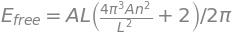

In [12]:
E_free = H_free.integrate((x, 0, L)).subs(k, 2*pi*n/L)
#E_free = H_free.integrate((x, 0, L)) #.subs(sin(L*k),0)
Eq(Symbol('E_{{free}}'), E_free)

In [13]:
V_integrated_ = V.integrate((x,0,L)).subs(k, 2*pi*n/L)
#V_integrated_ = V.integrate((x,0,L))
Eq(Symbol('V'), V_integrated_)

O termo

$\dfrac{AL\sin\left(\dfrac{2\pi n \min(L,\frac Ln)}{L}\right)}{\pi n}$

não foi eliminado pelo sympy mas pode ser facilmente verificado como resultando estritamente em zero. Portanto, como

In [14]:
V_integrated_.args

então

In [15]:
V_integrated = V.integrate((x,0,L)).subs(k, 2*pi*n/L)
V_integrated = V_integrated.args[0]
Eq(Symbol('V'), V_integrated)

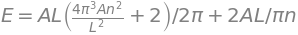

In [17]:
E = (E_free + V_integrated)
Eq(Symbol('E'), E)

In [18]:
print("min:")
Eq(i0, solve(Eq(E_func.diff(i0), 0), i0)[0])

min:


NameError: name 'i0' is not defined

In [19]:
n_num = 1

E_func = lambdify((A,L),  E.subs(n,n_num), 'numpy')

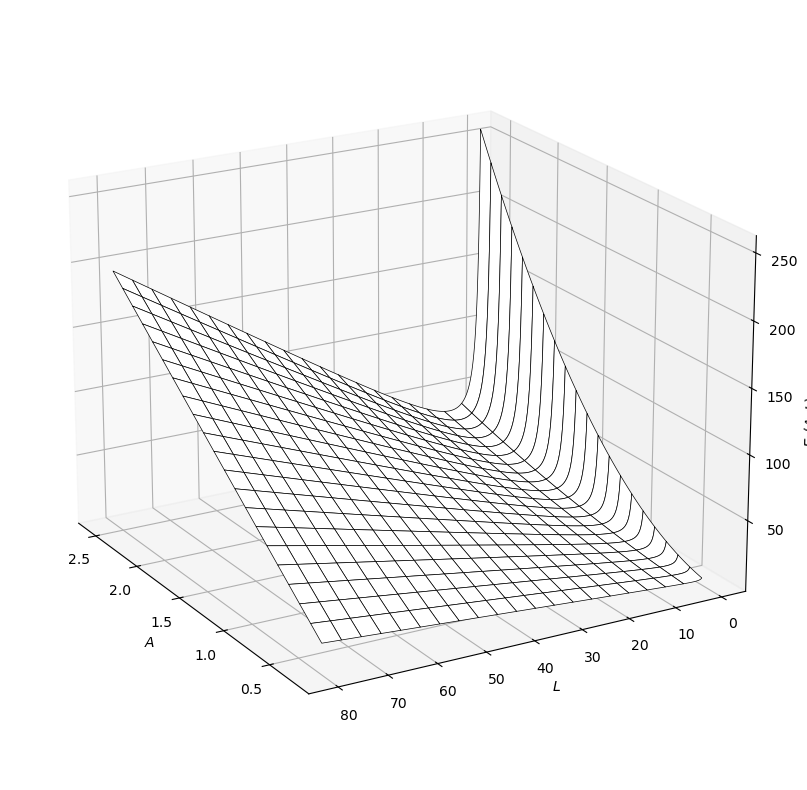

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [20, 10]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

N = 2000
M = 2000

m1 = 4/float(pi)

A_num = np.linspace(0.2*m1 ,2*m1,N)
L_num = np.linspace(0.50, 80, M)
X,Y = np.meshgrid(A_num,L_num)
Z = E_func(X, Y)

ax.plot_surface(X, Y, Z, rstride=int(100), cstride=int(100), color='w', edgecolor='k', shade=False, lw=0.5)

#ax.set_zlim(0, 5)
#ax.set_xlim(-51, 51)
ax.set_xlabel('$A$')
ax.set_ylabel('$L$')
ax.set_zlabel("$E_{{{}}}(A,L)$".format(n_num))
ax.view_init(20,150)
plt.show()

In [26]:
A_num = 4/float(pi)
L_num = 200
En = lambdify(n,  E.subs(A, A_num).subs(L, L_num), 'numpy')
En_num = lambda n_num: En(n_num)

En_num(3)

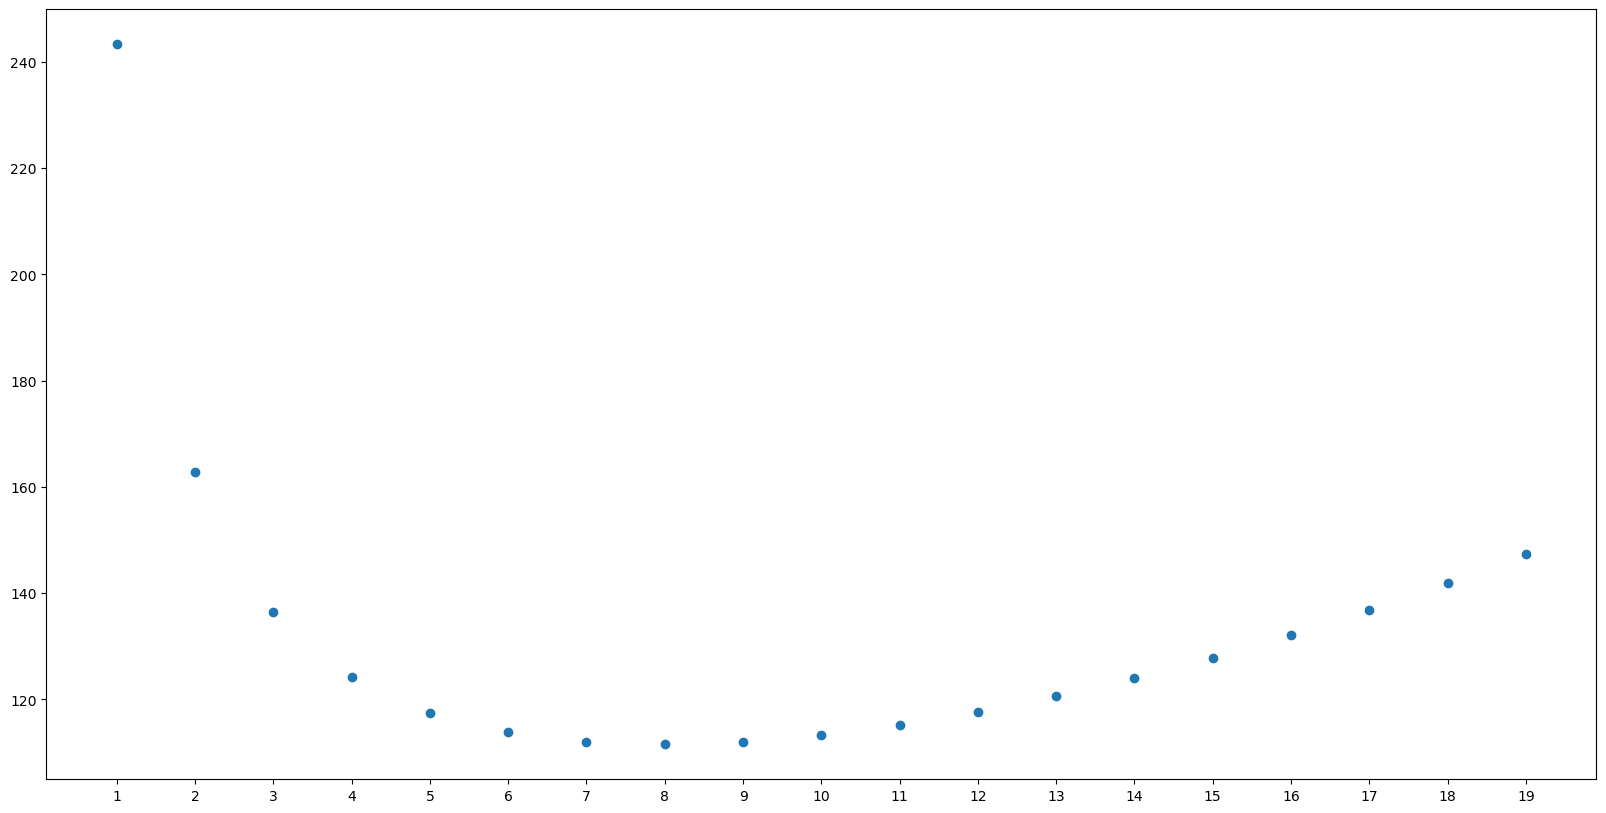

In [24]:
n_num_ = np.arange(1, 20, 1)
ax = plt.scatter(n_num_, En_num(n_num_))
ax.axes.set_xticks(n_num_)
#En_EAL(2)
print()

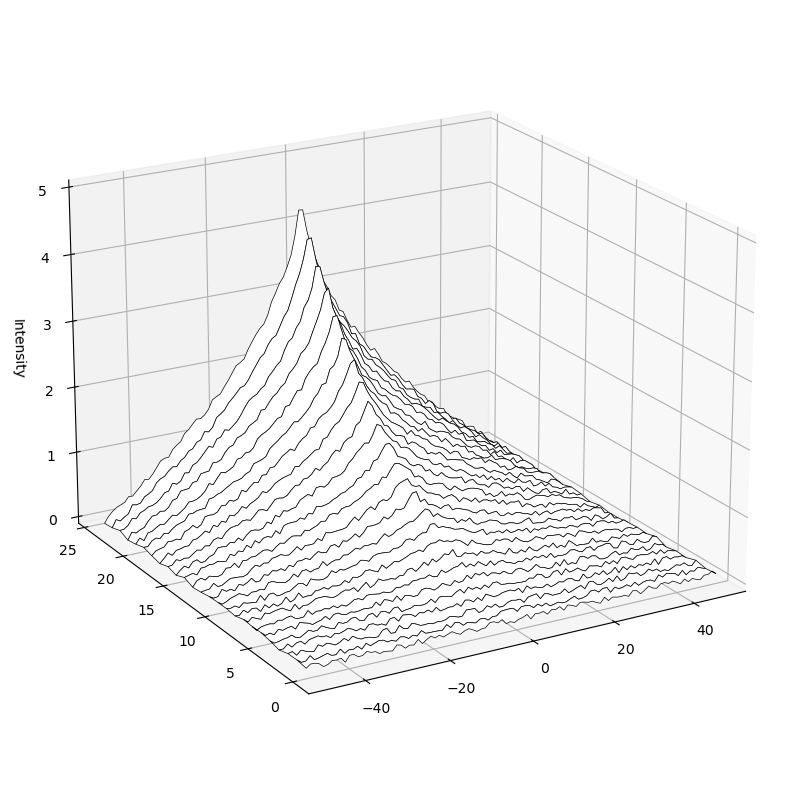

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [20, 10]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-50,50,100)
y = np.arange(25)
X,Y = np.meshgrid(x,y)
Z = np.zeros((len(y),len(x)))

for i in range(len(y)):
    damp = (i/float(len(y)))**2
    Z[i] = 5*damp*(1 - np.sqrt(np.abs(x/50)))
    Z[i] += np.random.uniform(0,.1,len(Z[i]))

ax.plot_surface(X, Y, Z, rstride=1, cstride=1000, color='w', edgecolors='k', shade=False, lw=0.5)

ax.set_zlim(0, 5)
ax.set_xlim(-51, 51)
ax.set_zlabel("Intensity")
ax.view_init(20,-120)
plt.show()


In [ ]:
ax.plot_surface?

Signature:
ax.plot_surface(
    X,
    Y,
    Z,
    *,
    norm=None,
    vmin=None,
    vmax=None,
    lightsource=None,
    **kwargs,
)
Docstring:
Create a surface plot.

By default, it will be colored in shades of a solid color, but it also
supports colormapping by supplying the *cmap* argument.

.. note::

   The *rcount* and *ccount* kwargs, which both default to 50,
   determine the maximum number of samples used in each direction.  If
   the input data is larger, it will be downsampled (by slicing) to
   these numbers of points.

.. note::

   To maximize rendering speed consider setting *rstride* and *cstride*
   to divisors of the number of rows minus 1 and columns minus 1
   respectively. For example, given 51 rows rstride can be any of the
   divisors of 50.

   Similarly, a setting of *rstride* and *cstride* equal to 1 (or
   *rcount* and *ccount* equal the number of rows and columns) can use
   the optimized path.

Parameters
----------
X, Y, Z : 2D arrays
    Data values